In [50]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical as to_cat
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt

## just for downloading files purpose
from urllib.request import urlretrieve
import zipfile , os 


### Downloading data from source 

In [21]:
training_data_link = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = 'data/horse-or-human.zip'
urlretrieve(training_data_link,file_name)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('data/horse-human/train')

In [22]:
validation_data_link = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"
file_name = 'data/validation-horse-or-human.zip'
urlretrieve(validation_data_link,file_name)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('data/horse-human/validation')

In [23]:
train_datagen =ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=20,
                                  height_shift_range=20,
                                  shear_range=20,
                                  zoom_range=20,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                 )


validation_datagen =ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=20,
                                  height_shift_range=20,
                                  shear_range=20,
                                  zoom_range=20,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                 )

In [25]:
train_gen  =  train_datagen.flow_from_directory(
    'data/horse-human/train',
    target_size=(300,300),
    class_mode='binary'
)

validation_gen  =  validation_datagen.flow_from_directory(
    'data/horse-human/validation',
    target_size=(300,300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Building Model

In [26]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
history = model.fit(train_gen,epochs=10,validation_data=validation_gen)

Epoch 1/10
33/33 [==============================] - 58s 2s/step - loss: 3.1188 - acc: 0.5716 - val_loss: 0.6994 - val_acc: 0.5039
Epoch 2/10
33/33 [==============================] - 53s 2s/step - loss: 0.6153 - acc: 0.6689 - val_loss: 0.8326 - val_acc: 0.5039
Epoch 3/10
33/33 [==============================] - 53s 2s/step - loss: 0.6581 - acc: 0.6300 - val_loss: 0.7178 - val_acc: 0.5039
Epoch 4/10
33/33 [==============================] - 51s 2s/step - loss: 0.6104 - acc: 0.6456 - val_loss: 1.1016 - val_acc: 0.5000
Epoch 5/10
33/33 [==============================] - 53s 2s/step - loss: 0.5611 - acc: 0.7001 - val_loss: 0.7068 - val_acc: 0.5586
Epoch 6/10
33/33 [==============================] - 53s 2s/step - loss: 0.5516 - acc: 0.7137 - val_loss: 0.9047 - val_acc: 0.5117
Epoch 7/10
33/33 [==============================] - 68s 2s/step - loss: 0.5183 - acc: 0.7410 - val_loss: 0.6651 - val_acc: 0.5664
Epoch 8/10
33/33 [==============================] - 65s 2s/step - loss: 0.4990 - acc: 0.75

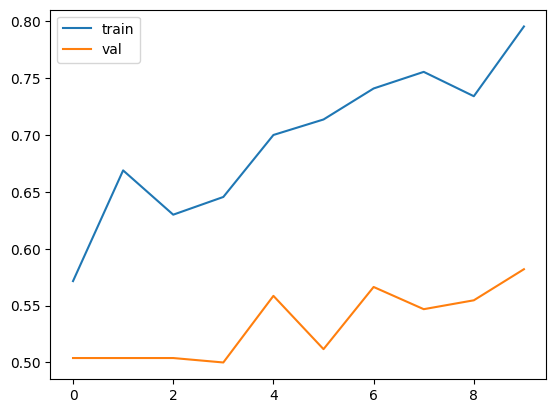

In [30]:
## Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["train","val"],loc='upper left')

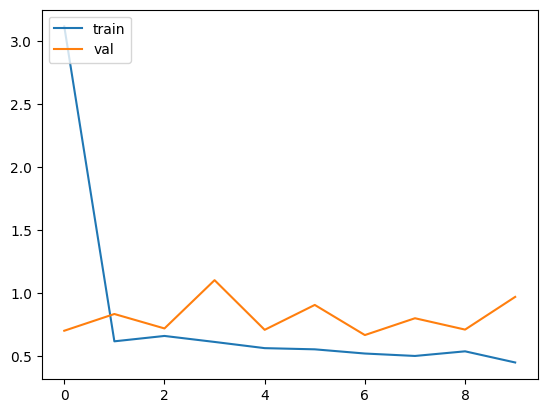

In [31]:
## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

### Making Prediction 

In [77]:
def predict(img_path):
    img= img_to_array(load_img(img_path,target_size=(300,300)))
    img =  np.expand_dims(img,axis=0)
    classes =  model.predict([img])
    if classes[0] > 0.5:
        print("human")
    else:
        print("horse")

In [79]:
file_img  = "C:/Users/RISHABH/Pictures/images/humanImg.jpg"
predict(file_img)

1/1 [==============================] - 0s 53ms/step
human
